<a href="https://colab.research.google.com/github/sidmanale643/Diabetes-Prediction/blob/main/diabetes_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [174]:
df = pd.read_csv('/content/diabetes.csv')

In [175]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
df.describe( )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [177]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [178]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [179]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Age']].replace(0,np.NaN) 

In [180]:
df['Glucose'].fillna(df['Glucose'].mean() , inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean() , inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean() , inplace = True)
df['Insulin'].fillna(df['Insulin'].mean() , inplace = True)
df['BMI'].fillna(df['BMI'].mean() , inplace = True)
df['Age'].fillna(df['Age'].mean() , inplace = True)

In [182]:
corr = df.corr()

<Axes: >

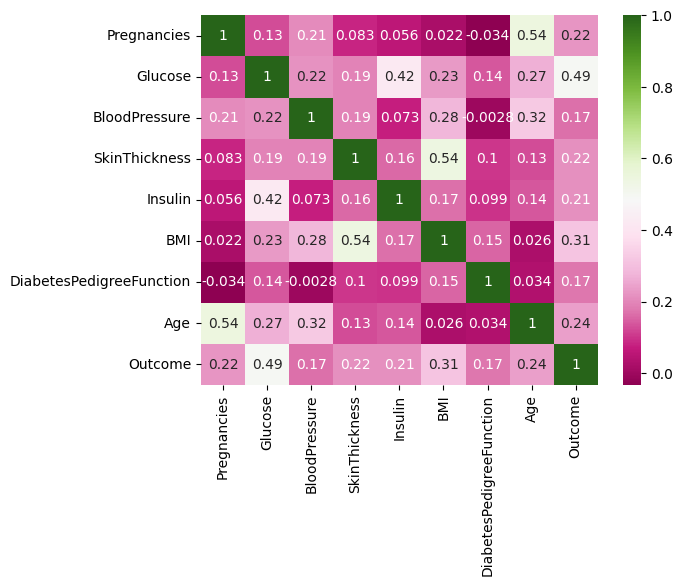

In [183]:
sns.heatmap(corr , cmap="PiYG" , annot=True)

<Axes: >

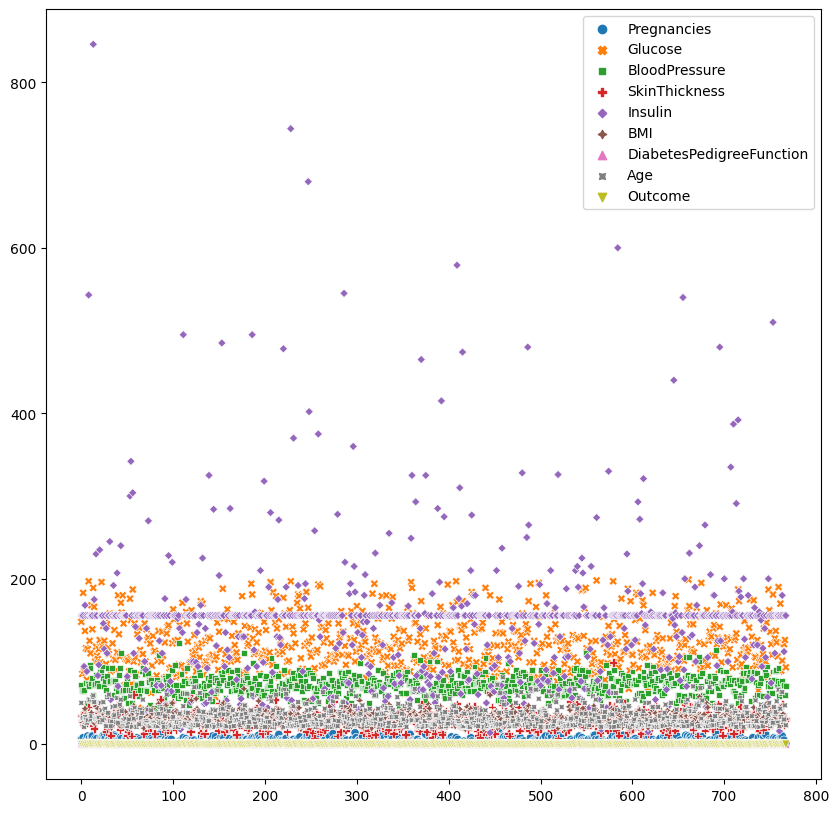

In [185]:
plt.figure(figsize = (10,10))
sns.scatterplot(df)

<Axes: >

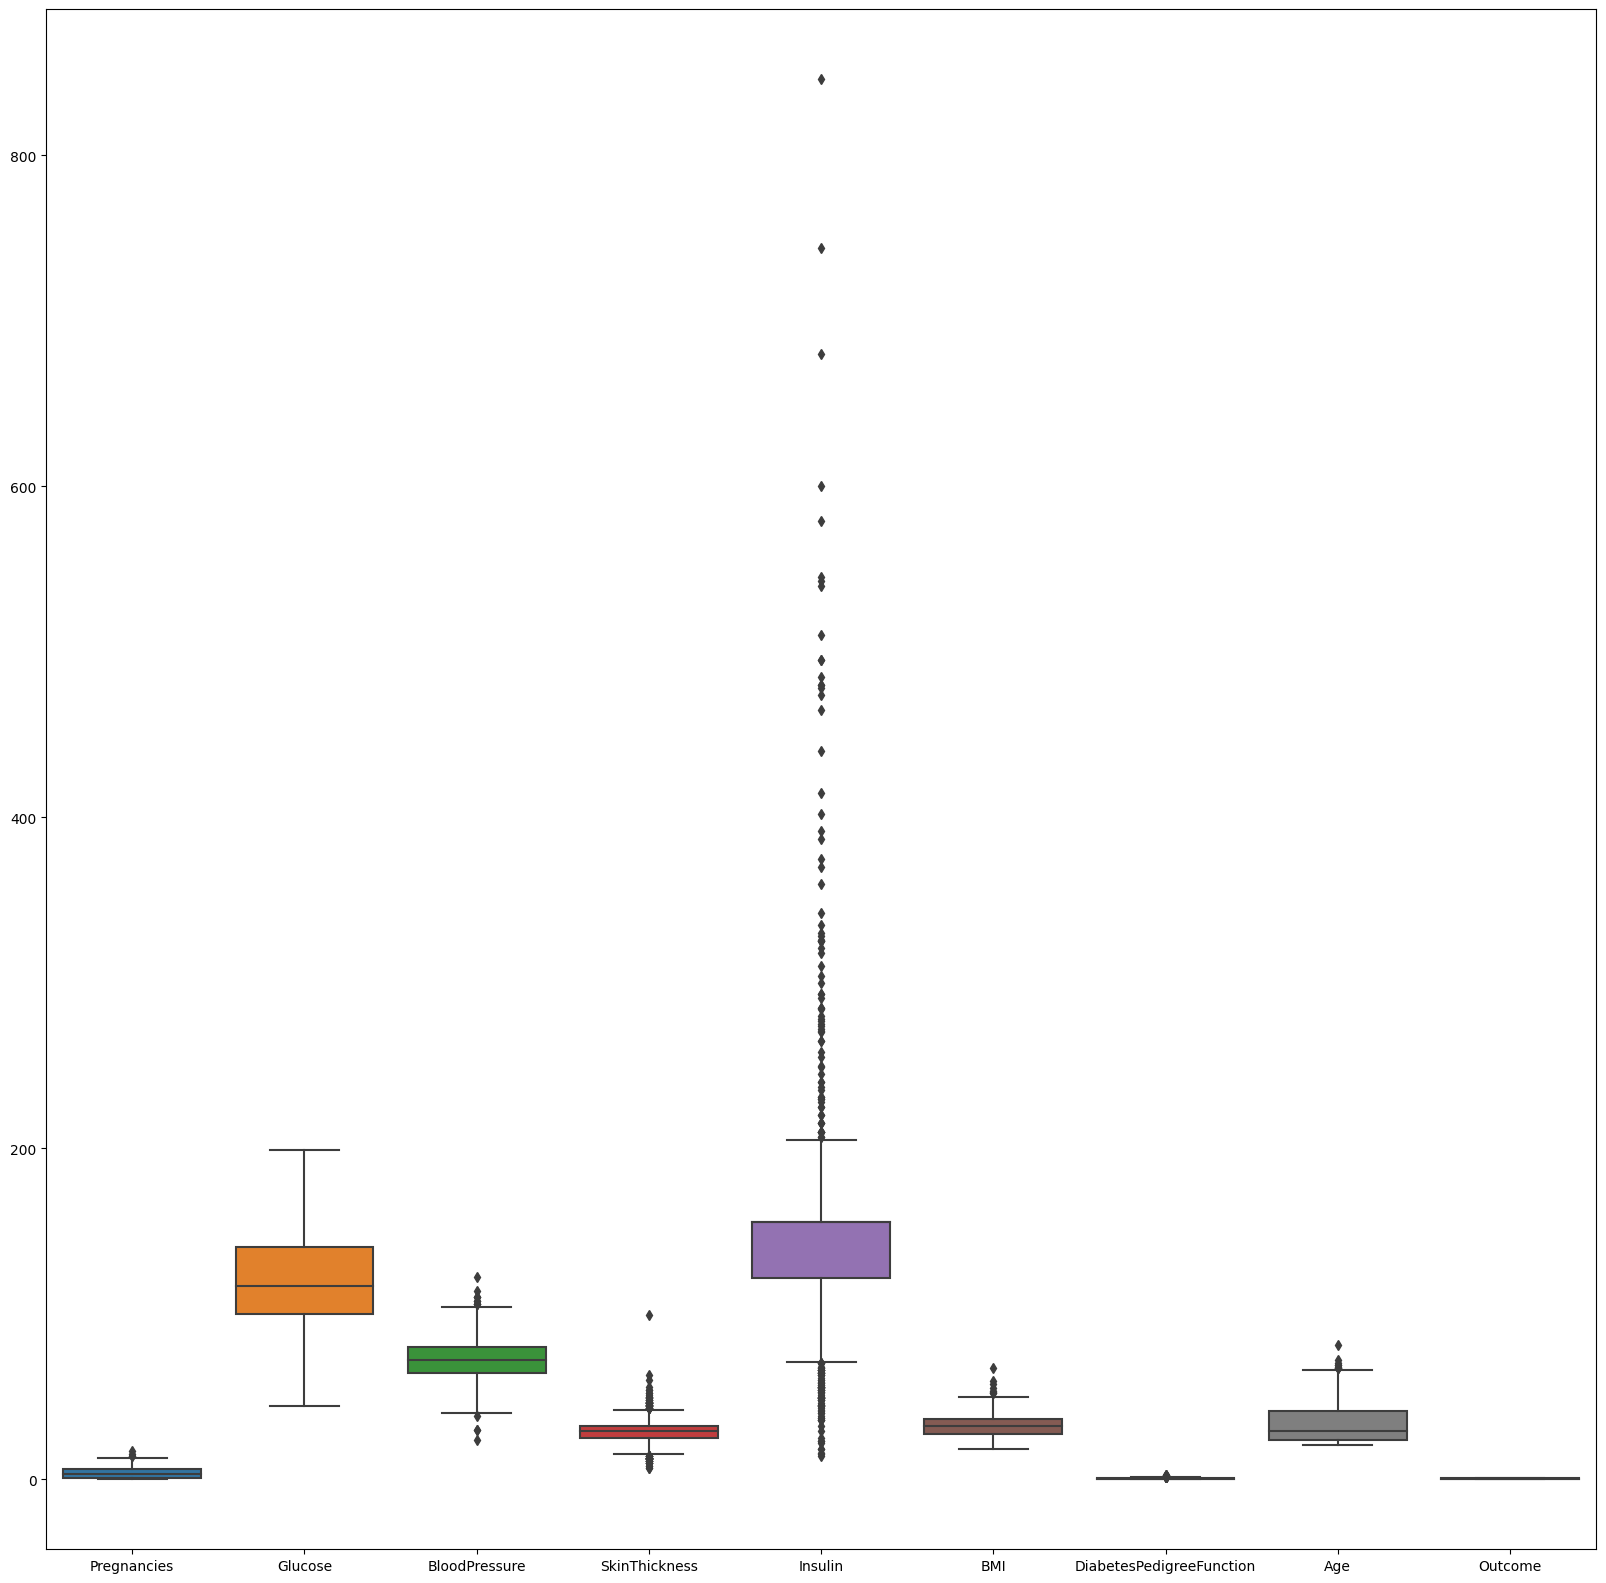

In [186]:
plt.figure(figsize = (20,20))
sns.boxplot(df)

In [187]:
#Z Score = (x − x̅ )/σ Where, x = Standardized random variable. x̅ = Mean. σ = Standard deviation.
outliers = []
def find_black_sheep(df):
  mean = np.mean(df)
  std = np.std(df)
  threshold = 3
  for i in df:
    z_score = (i - mean)/std
    if np.abs(z_score) > 3:
      outliers.append(i)
  return outliers

In [188]:
cols = df.columns
len(cols)
for x in range(9):
  find_black_sheep(df[cols[x]])

<Axes: xlabel='Outcome', ylabel='Count'>

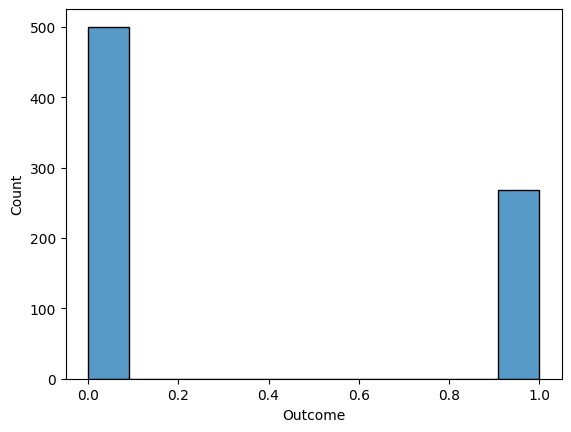

In [242]:
sns.histplot(df['Outcome'])

0    500
1    268
Name: Outcome, dtype: int64


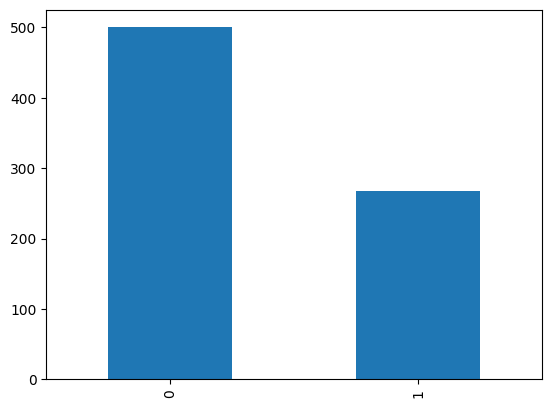

In [190]:
df['Outcome'].value_counts().plot(kind = 'bar')
print(df.Outcome.value_counts())

In [227]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']


In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()

In [230]:
X =scaler.fit_transform(X)

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3)

In [233]:
from xgboost import XGBClassifier

In [234]:
xgbc = XGBClassifier()

In [235]:
xgbc.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [243]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [244]:
xgbc_pred = xgbc.predict(X_test)

In [245]:
print(classification_report(y_test,xgbc_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       163
           1       0.56      0.57      0.57        68

    accuracy                           0.74       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.74      0.74      0.74       231



In [239]:
accuracy_score(y_test,xgbc_pred)

0.7402597402597403

In [247]:
print(confusion_matrix(y_test,xgbc_pred))

[[132  31]
 [ 29  39]]


In [250]:
xgbc.score(X_train,y_train)

1.0

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
dtc = DecisionTreeClassifier()

In [205]:
dtc.fit(X_train , y_train)

DecisionTreeClassifier()

In [207]:
dtc_pred = dtc.predict(X_test)

In [208]:
accuracy_score(y_test,dtc_pred)

0.683982683982684

In [209]:
from sklearn.linear_model import LogisticRegression


In [210]:
lr = LogisticRegression()

In [211]:
lr.fit(X_train , y_train)

LogisticRegression()

In [212]:
lr_pred = lr.predict(X_test)


In [213]:
accuracy_score(y_test,lr_pred)



0.7835497835497836